# **Classifying Nuclear Deployment Methods using Machine Learning**


---



# **1. Problem Definition**
The goal of this problem is explore **multi-class imbalanced classification** (a sample can be one of many things) on the world's nuclear explosion data.

This is because we're going to be using a number of different **features** about a detonated nuclear bomb to predict their deployment method.

In a statement,


> Given explosion parameters about a nuclear bomb, can we predict the deployment method of the nuclear bomb?

# **2. Data**

The original data came from the [Stockholm International Peace Research Institute](https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-08-20) through the [tidytuesday github repository](https://github.com/rfordatascience/tidytuesday).

The original dataset is comprised of 16 attributes. These **Attributes/Features** are the variables that will be used to predict the **target variable**.

The **independent variables** in this data are the different attributes about the detonated nuclear bombs, and the **dependent variable** is the nuclear bomb deployment method.

# **3. Evaluation**


> If we can reach  a 95% accuracy at predicting/classifying nuclear bomb deployment methods during this proof of concept, we'll pursue this project.



# **4. Features**

**Nuclear Explosions Data Dictionary**

The following are the features used to predict the target variable (deployment method of nuclear bombs):



*   **1. date_long** - ymd date
*   **2. year** - year of explosion
*   **3. id_no** - unique ID
*   **4. country** - 	Country deploying the nuclear device
*   **5. region** - Region where nuclear device was deployed
*   **6. source** - 	Source the reported the explosion event
*   **7. latitude** - Latitude position
*   **8. logitude** - Longitude position
*   **9. magnitude_body** - Body wave magnitude of explosion (mb)
*   **10. magnitude_surface** - Surface wave magnitude of explosion (Ms)
*   **11. depth** - Depth at detonation in Km (could be underground or above ground) -- please note that positive = depth (below ground), while negative = height (above ground)
*   **12. yield_lower** - Explosion yield lower estimate in kilotons of TNT
*   **13. yield_upper** - Explosion yield upper estimate in kilotons of TNT
*   **14. purpose** - Purpose of detonation: COMBAT (WWII bombs dropped over Japan), FMS (Soviet test, study phenomenon of nuclear explosion), ME (Military Exercise), PNE (Peaceful nuclear explosion), SAM (Soviet test, accidental mode/emergency), SSE (French/US tests - testing safety of nuclear weapons in case of accident), TRANSP (Transportation-storage purposes), WE (British, French, US, evaluate effects of nuclear detonation on various targets), WR (Weapons development program)
*   **15. name** - Name of event or bomb
*   **16. type (target(** - type - method of deployment -- ATMOSPH (Atmospheric), UG (underground), BALLOON (Balloon drop), AIRDROP (Airplane deployed), ROCKET (Rocket deployed), TOWER (deplyed at top of constructed tower), WATERSURFACE (on surface of body of water), BARGE (on barge boat), SURFACE (on surface or in shallow crater), UW (Underwater), SHAFT (Vertical Shaft underground), TUNNEL/GALLERY (Horizontal tunnel)











In [1]:
# Updating matplotlib for up to date visualization features
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 7.6 MB/s 
     |████████████████████████████████| 957 kB 44.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


# **5. Preparing the Tools**

In [69]:
# Importing Standard EDA Libraries
import pandas as pd
from pandas import set_option
import numpy as np

# Importing Statistical Analysis Libraries
from scipy import stats

# Importing Data Visualization Libraries
import matplotlib.pyplot as plt
# plots should appear in notebook
%matplotlib inline
import seaborn as sns

# Visualization themes & styles
plt.style.use('ggplot')
sns.set_theme(style = "darkgrid", palette = "pastel")

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Classification Model Evaluators & Feature Engineering Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **6. Load Data**

In [2]:
# Import Nuclear Explosions CSV
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-08-20/nuclear_explosions.csv")

# **7. Exploratory Data Analysis (EDA)**

EDA Template that will be followed for this problem:


1.   What question(s) are you trying to solve (or prove wrong)?
2.   What kind of data do you have and what are the different types of data present?
3.   What's missing from the data and how do you deal with it?
4.   Where are the outliers and are they something to be concerned about?
5.   How can you add, change or remove features to get more out of your data?




**7.1 Data Description**

In [3]:
# Top 10 rows of dataframe
df.head(10)

,date_long,year,id_no,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,name,type
0,19450716,1945,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER
1,19450805,1945,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP
2,19450809,1945,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP
3,19460630,1946,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP
4,19460724,1946,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW
5,19480414,1948,48001,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,37.0,37.0,WR,X-RAY,TOWER
6,19480430,1948,48002,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,49.0,49.0,WR,YOKE,TOWER
7,19480514,1948,48003,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,18.0,18.0,WR,ZEBRA,TOWER
8,19490829,1949,49001,USSR,SEMI KAZAKH,DOE,48.00,76.00,0.0,0.0,0.00,22.0,22.0,WR,NaN,SURFACE
9,19510127,1951,51001,USA,NTS,DOE,37.00,-116.00,0.0,0.0,-0.35,1.0,1.0,WR,ABLE,AIRDROP


In [4]:
# Shape of dataframe
print(df.shape)

(2051, 16)


**7.2 Descriptive Statistics**

In [5]:
# Data types
df.dtypes

date_long              int64
year                   int64
id_no                  int64
country               object
region                object
source                object
latitude             float64
longitude            float64
magnitude_body       float64
magnitude_surface    float64
depth                float64
yield_lower          float64
yield_upper          float64
purpose               object
name                  object
type                  object
dtype: object

In [6]:
# Number of unique values/types in each column
dict = {}
for i in list(df.columns):
  dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index = ["# of Unique Values"]).transpose()

,# of Unique Values
date_long,1756
year,50
id_no,2050
country,7
region,79
source,13
latitude,527
longitude,575
magnitude_body,43
magnitude_surface,26


In [7]:
# Number of each deployment method in the dataset
df.type.value_counts()

SHAFT       1015
TUNNEL       310
ATMOSPH      185
SHAFT/GR      85
AIRDROP       78
TOWER         75
BALLOON       62
SURFACE       62
SHAFT/LG      56
BARGE         40
UG            32
ROCKET        13
GALLERY       13
CRATER         9
UW             8
SPACE          4
SHIP           1
WATERSUR       1
WATER SU       1
MINE           1
Name: type, dtype: int64

In [8]:
# Normalized value counts (percentages) of deployment types
df.type.value_counts(normalize = True)

SHAFT       0.494881
TUNNEL      0.151146
ATMOSPH     0.090200
SHAFT/GR    0.041443
AIRDROP     0.038030
TOWER       0.036568
BALLOON     0.030229
SURFACE     0.030229
SHAFT/LG    0.027304
BARGE       0.019503
UG          0.015602
ROCKET      0.006338
GALLERY     0.006338
CRATER      0.004388
UW          0.003901
SPACE       0.001950
SHIP        0.000488
WATERSUR    0.000488
WATER SU    0.000488
MINE        0.000488
Name: type, dtype: float64

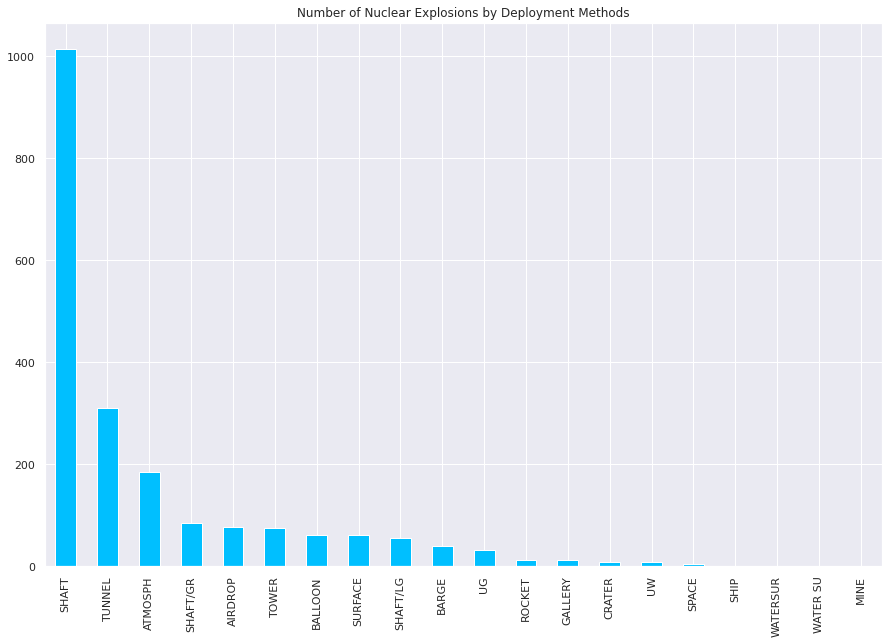

In [9]:
# Plot the deployment methods as a bar graph
df.type.value_counts().plot(kind = "bar", color = "deepskyblue", title = "Number of Nuclear Explosions by Deployment Methods", figsize = (15, 10));

There are far too many classes here and many of them appear to be identical in terms of their deployment method. Let's simplify and collpase the deployment types them into 4 deployment methods:
* `Air`
* `Surface`
* `Underground`
* `Water`

In [10]:
# Merging identical deployment types
df_cleaned = df

df_cleaned["type"].replace({"ATMOSPH": "Air", "BALLOON": "Air", "AIRDROP": "Air", "SPACE": "Air"}, inplace = True)
df_cleaned["type"].replace({"UG": "Underground", "SHAFT": "Underground", "GALLERY": "Underground", "SHAFT/GR": "Underground", "SHAFT/LG": "Underground", "TUNNEL": "Underground", "MINE": "Underground"}, inplace = True)
df_cleaned["type"].replace({"ROCKET": "Surface", "WATERSURFACE": "Surface", "BARGE": "Surface", "SURFACE": "Surface", "SHIP": "Surface", "CRATER": "Surface", "TOWER": "Surface", "WATERSUR": "Surface", "WATER SU": "Surface"}, inplace = True)
df_cleaned["type"].replace({"UW": "Underwater"}, inplace = True)

df_cleaned.head(10)

,date_long,year,id_no,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,name,type
0,19450716,1945,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,Surface
1,19450805,1945,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,Air
2,19450809,1945,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,Air
3,19460630,1946,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,Air
4,19460724,1946,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,Underwater
5,19480414,1948,48001,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,37.0,37.0,WR,X-RAY,Surface
6,19480430,1948,48002,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,49.0,49.0,WR,YOKE,Surface
7,19480514,1948,48003,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,18.0,18.0,WR,ZEBRA,Surface
8,19490829,1949,49001,USSR,SEMI KAZAKH,DOE,48.00,76.00,0.0,0.0,0.00,22.0,22.0,WR,NaN,Surface
9,19510127,1951,51001,USA,NTS,DOE,37.00,-116.00,0.0,0.0,-0.35,1.0,1.0,WR,ABLE,Air


In [11]:
# Inspect unique deployment types
df_cleaned['type'].unique()

array(['Surface', 'Air', 'Underwater', 'Underground'], dtype=object)

In [12]:
# Remove 'Space' deployment type and replace with 'Air' for simplicity
df_cleaned["type"].replace({"Space": "Air"}, inplace = True)

In [13]:
# Inspect if 'Space' deployment type if still present in dataframe
df_cleaned.loc[df_cleaned['type'] == "Space"]

,date_long,year,id_no,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,name,type


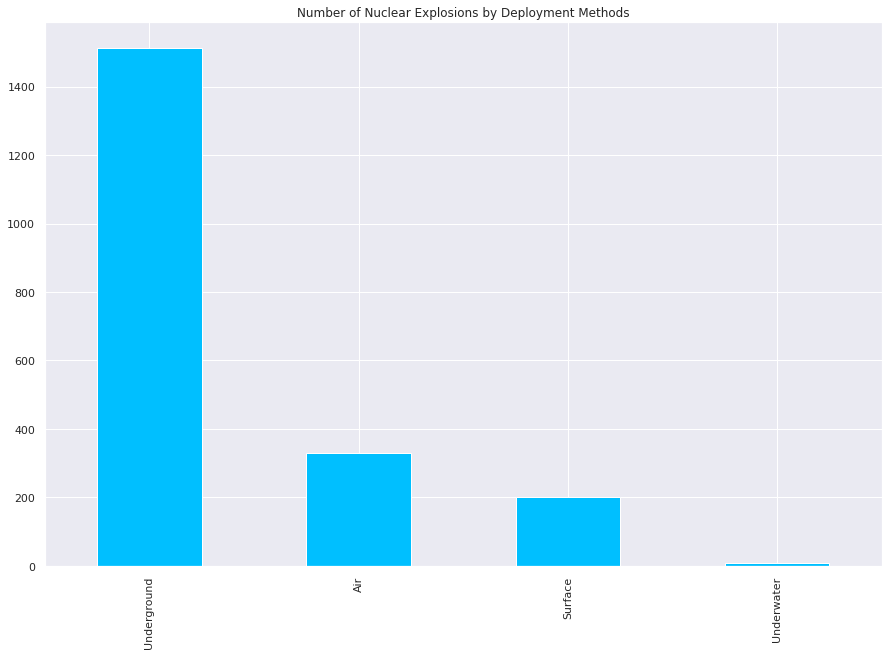

In [14]:
# Plot the deployment methods as a bar graph
df_cleaned.type.value_counts().plot(kind = "bar", color = "deepskyblue", title = "Number of Nuclear Explosions by Deployment Methods", figsize = (15, 10));

It seems we have **imbalanced classes** because the most common deployment type is `Underground`, and the least deployment is underwater. Meaning that we have an **imbalanced multiclass classification problem**, so we will resort to imbalanced classification techniques to classify the deployment types. There just isn't enough samples for the `Air`, `Surface`, and `Underwater` classes when compared to the `Underground` class.

In [15]:
# Seperating columns into categorical and continuous features
categorical_cols = ['country', 'region', 'source', 'purpose']
continuous_cols = ['latitude', 'longitude', 'magnitude_body', 'magnitude_surface', 'depth', 'yield_lower', 'yield_upper']
target_col = ['type']
print("The categorical features are:", categorical_cols)
print("The continuous features are:", continuous_cols)
print("The target variable is: ", target_col)

The categorical features are: ['country', 'region', 'source', 'purpose']
The continuous features are: ['latitude', 'longitude', 'magnitude_body', 'magnitude_surface', 'depth', 'yield_lower', 'yield_upper']
The target variable is:  ['type']


In [16]:
# Summary Statistics
df_cleaned[continuous_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,2051.0,35.397331,23.403654,-49.50,37.000,37.100,49.87,75.100
longitude,2051.0,-36.048777,100.864340,-169.32,-116.054,-116.000,78.00,179.220
magnitude_body,2051.0,2.144905,2.624897,0.00,0.000,0.000,5.10,7.400
magnitude_surface,2051.0,0.355826,1.202229,0.00,0.000,0.000,0.00,6.000
depth,2051.0,-0.489633,10.967699,-400.00,0.000,0.000,0.00,1.451
yield_lower,2048.0,209.217532,1641.346929,0.00,0.000,0.001,20.00,50000.000
yield_upper,2046.0,323.431021,2055.203066,0.00,18.250,20.000,150.00,50000.000


**7.3 Handling Missing Values & Duplicates**

In [17]:
# Number of Missing Values
df_cleaned.isnull().sum()

date_long              0
year                   0
id_no                  0
country                0
region                 0
source                 0
latitude               0
longitude              0
magnitude_body         0
magnitude_surface      0
depth                  0
yield_lower            3
yield_upper            5
purpose                1
name                 665
type                   0
dtype: int64

In [18]:
# Remove name feature as it is irrelevant to analysis
df_cleaned = df.drop('name', axis = 1)
df_cleaned.isnull().sum()

date_long            0
year                 0
id_no                0
country              0
region               0
source               0
latitude             0
longitude            0
magnitude_body       0
magnitude_surface    0
depth                0
yield_lower          3
yield_upper          5
purpose              1
type                 0
dtype: int64

In [19]:
# Drop Missing Values
df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().sum()

date_long            0
year                 0
id_no                0
country              0
region               0
source               0
latitude             0
longitude            0
magnitude_body       0
magnitude_surface    0
depth                0
yield_lower          0
yield_upper          0
purpose              0
type                 0
dtype: int64

In [20]:
# Number of Duplicates
duplicates_number = df_cleaned.duplicated().sum()
print("Number of duplicated rows is: ", duplicates_number)

Number of duplicated rows is:  0


**7.4 Comparing Features with Target Variabl**

**Deployment Type by Country**

In [21]:
# Number of Countries that detonated Nuclear Bombs
df_cleaned.country.value_counts()

USA       1031
USSR       714
FRANCE     207
UK          45
CHINA       43
INDIA        3
PAKIST       2
Name: country, dtype: int64

In [22]:
# Compare target column (deployment type) with Country Column
pd.crosstab(df_cleaned.type, df_cleaned.country)

country,CHINA,FRANCE,INDIA,PAKIST,UK,USA,USSR
type,,,,,,,
Air,18,35,0,0,11,80,182
Surface,4,13,0,0,10,140,34
Underground,21,159,3,2,24,806,495
Underwater,0,0,0,0,0,5,3


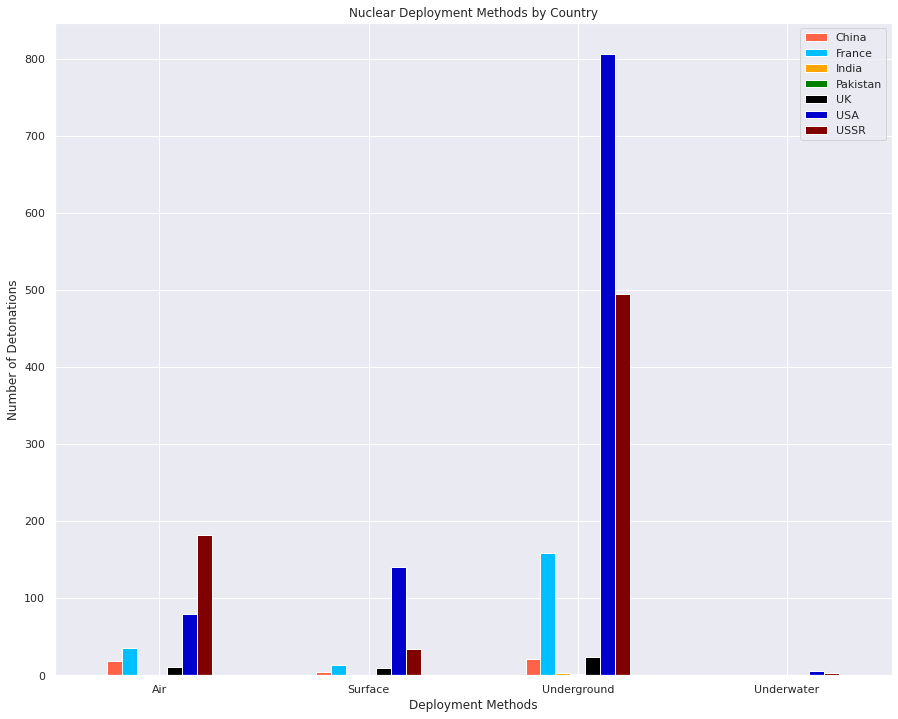

In [23]:
# Visualizing deployment types based on each country
pd.crosstab(df_cleaned.type, df_cleaned.country).plot(kind = "bar", figsize = (15, 12), color = ["tomato", "deepskyblue", "orange", "green", "black", "mediumblue", "maroon"])

# Adding plot attributes
plt.title("Nuclear Deployment Methods by Country")
plt.xlabel("Deployment Methods")
plt.legend(["China", "France", "India", "Pakistan", "UK", "USA", "USSR"])
plt.ylabel("Number of Detonations")
plt.xticks(rotation = 0); # Keep the labels on the x-axis vertical

* The **most common** deployment method of nuclear bombs is **underground**, and the the **least common** is **underwater**. 
* Furthermore, the USA has detonated substantially more nuclear bombs than all other countries in every deployment method with exception to deployment via **air**; where the USSR has detonated almost two times the nuclear bombs than USA did. 
* India and Pakistan have deployed the least amount of nuclear bombs across all deployment methods when compared to the other nations. 

**Upper Estimate of Explosion Power vs. Body Wave Magnitude of Explosion for Deployment Types**

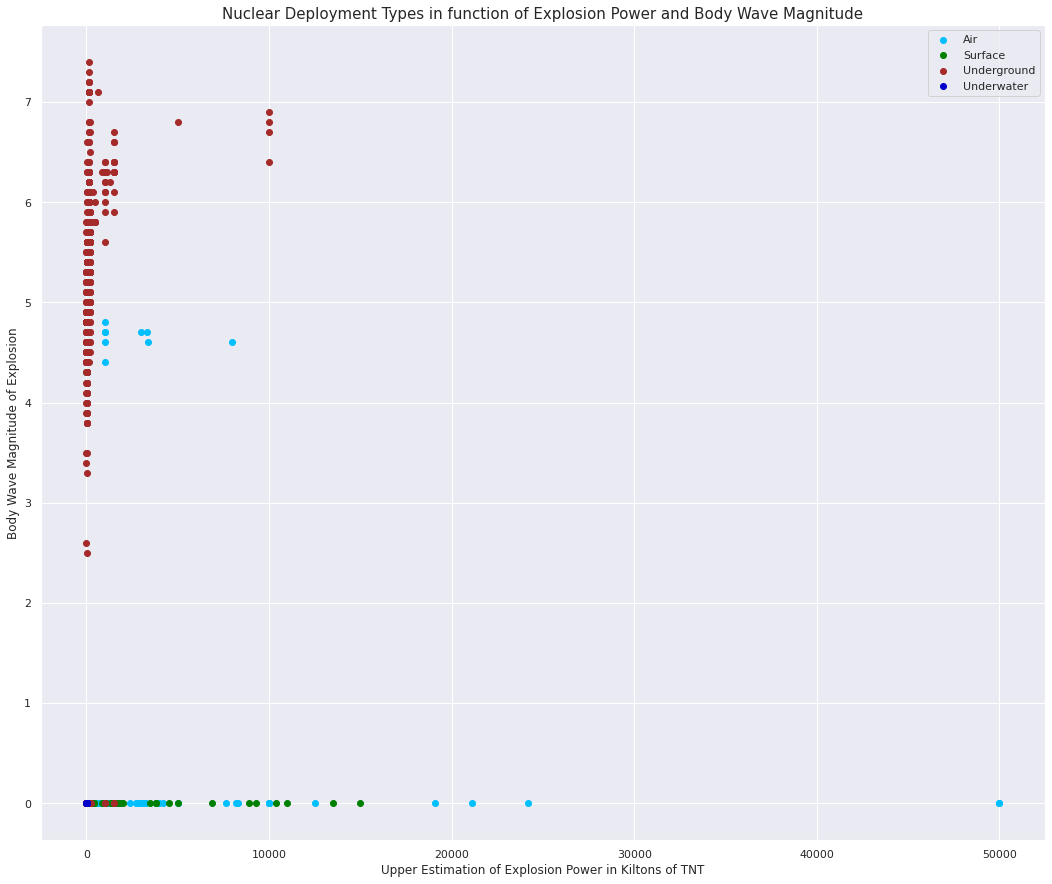

In [24]:
# Create plot figure
plt.figure(figsize = (18, 15))

# Plot nuclear bombs that were deployed in the air
plt.scatter(df_cleaned.yield_upper[df_cleaned.type == "Air"], df_cleaned.magnitude_body[df_cleaned.type == "Air"], c = "deepskyblue")

# Plot nuclear bombs that were deployed on the surface
plt.scatter(df_cleaned.yield_upper[df_cleaned.type == "Surface"], df_cleaned.magnitude_body[df_cleaned.type == "Surface"], c = "green")

# Plot nuclear bombs that were deployed underground
plt.scatter(df_cleaned.yield_upper[df_cleaned.type == "Underground"], df_cleaned.magnitude_body[df_cleaned.type == "Underground"], c = "brown")

# Plot nuclear bombs that were deployed underwater
plt.scatter(df_cleaned.yield_upper[df_cleaned.type == "Underwater"], df_cleaned.magnitude_body[df_cleaned.type == "Underwater"], c = "mediumblue")

# Adding plot attributes
plt.title("Nuclear Deployment Types in function of Explosion Power and Body Wave Magnitude", fontsize = 15)
plt.xlabel("Upper Estimation of Explosion Power in Kiltons of TNT")
plt.legend(["Air", "Surface", "Underground", "Underwater"])
plt.ylabel("Body Wave Magnitude of Explosion");

# **8. Data Visualizations**

**8.1 Univariate Data Visualizations**

***Bar Plots for Categorical Features***

                                                                      Bar Graphs for Categorical Features:                                                                     
                                                                    _______________________________________                                                                    


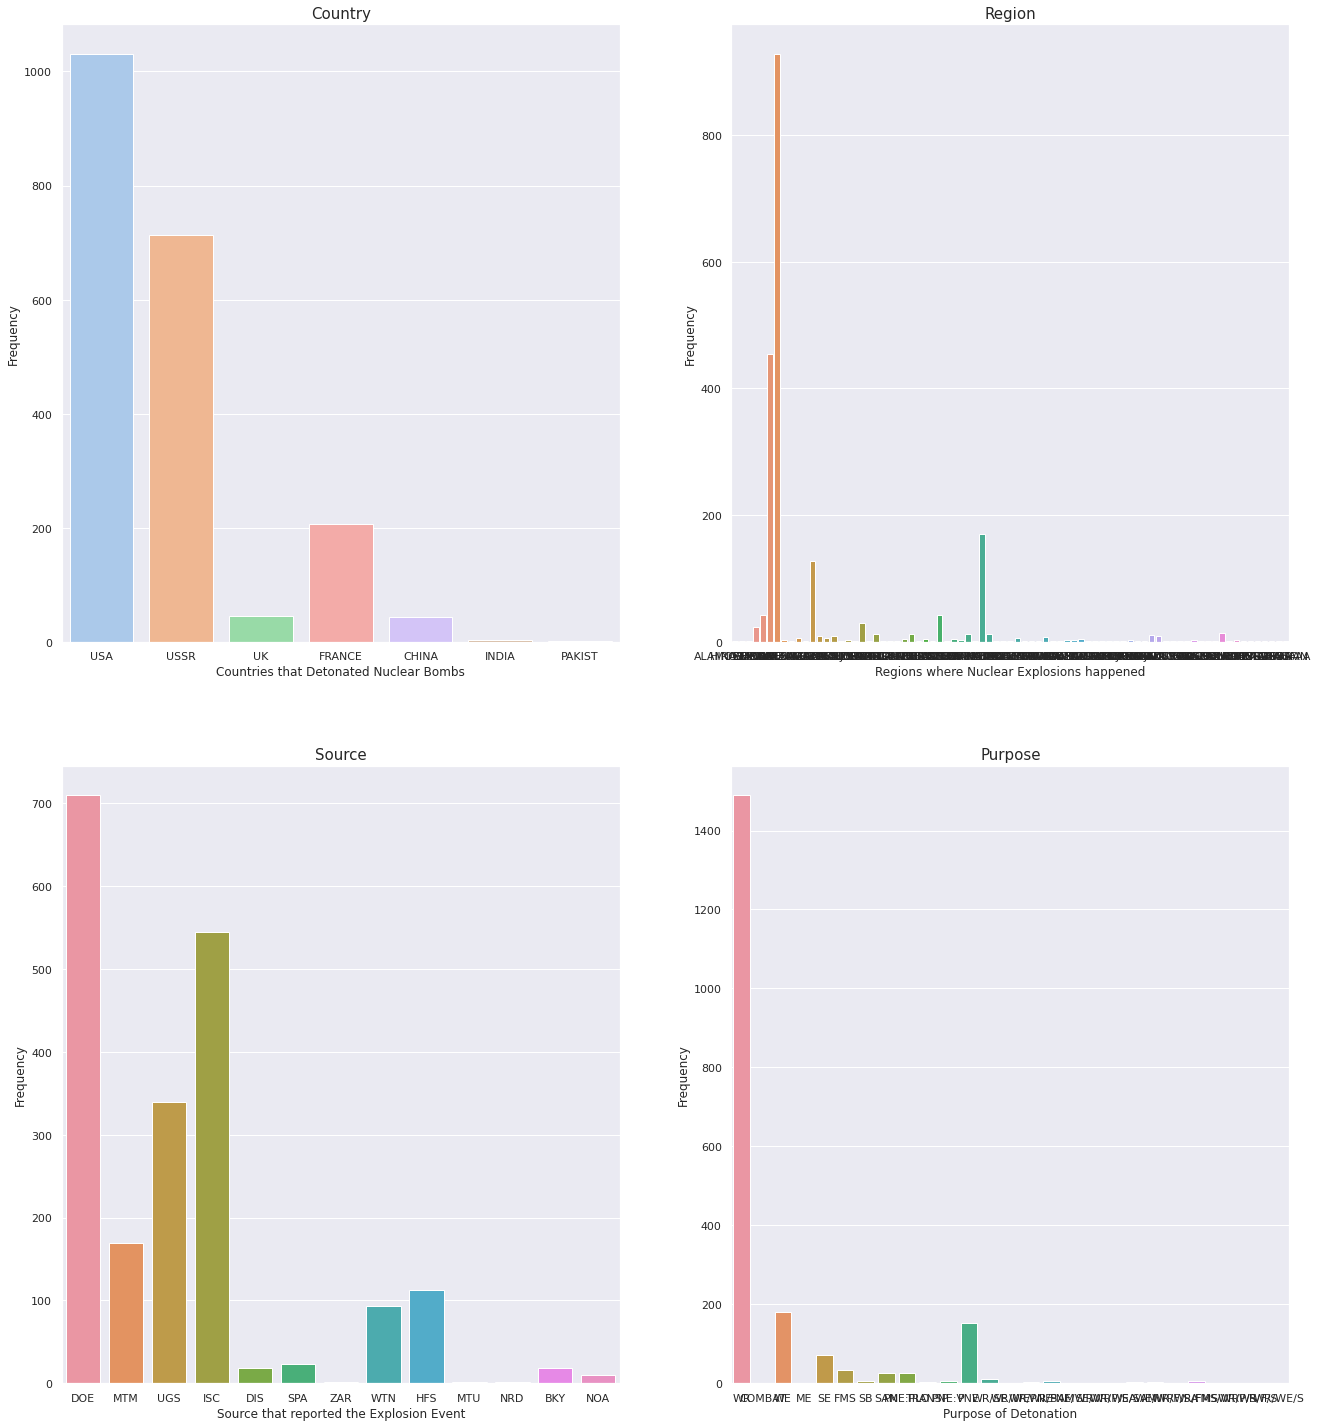

In [25]:
# Title for all Bar Graphs
title_all_graphs = "Bar Graphs for Categorical Features:"
centered_title = title_all_graphs.center(175)
underline = "_______________________________________"
centered_underline = underline.center(175)
print(centered_title)
print(centered_underline)

# Bar plots for the categorical features
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2,
                                             ncols = 2,
                                             figsize = (22, 25))

# country (bar plot)
sns.countplot(ax = ax0, data = df_cleaned, x = 'country')
ax0.set_title("Country", fontsize = 15)
ax0.set_xlabel("Countries that Detonated Nuclear Bombs")
ax0.set_ylabel("Frequency")

# region (bar plot)
sns.countplot(ax = ax1, data = df_cleaned, x = 'region')
ax1.set_title("Region", fontsize = 15)
ax1.set_xlabel("Regions where Nuclear Explosions happened")
ax1.set_ylabel("Frequency")

# source (bar plot)
sns.countplot(ax = ax2, data = df_cleaned, x = "source")
ax2.set_title("Source", fontsize = 15)
ax2.set_xlabel("Source that reported the Explosion Event")
ax2.set_ylabel("Frequency")

# purpose (bar plot)
sns.countplot(ax = ax3, data = df_cleaned, x = "purpose")
ax3.set_title("Purpose", fontsize = 15)
ax3.set_xlabel("Purpose of Detonation")
ax3.set_ylabel("Frequency");

***Box Plots for Continuous Features***

                                                                                   Box Plots for Continuous Features:                                                                                   
                                                                                    _______________________________                                                                                     


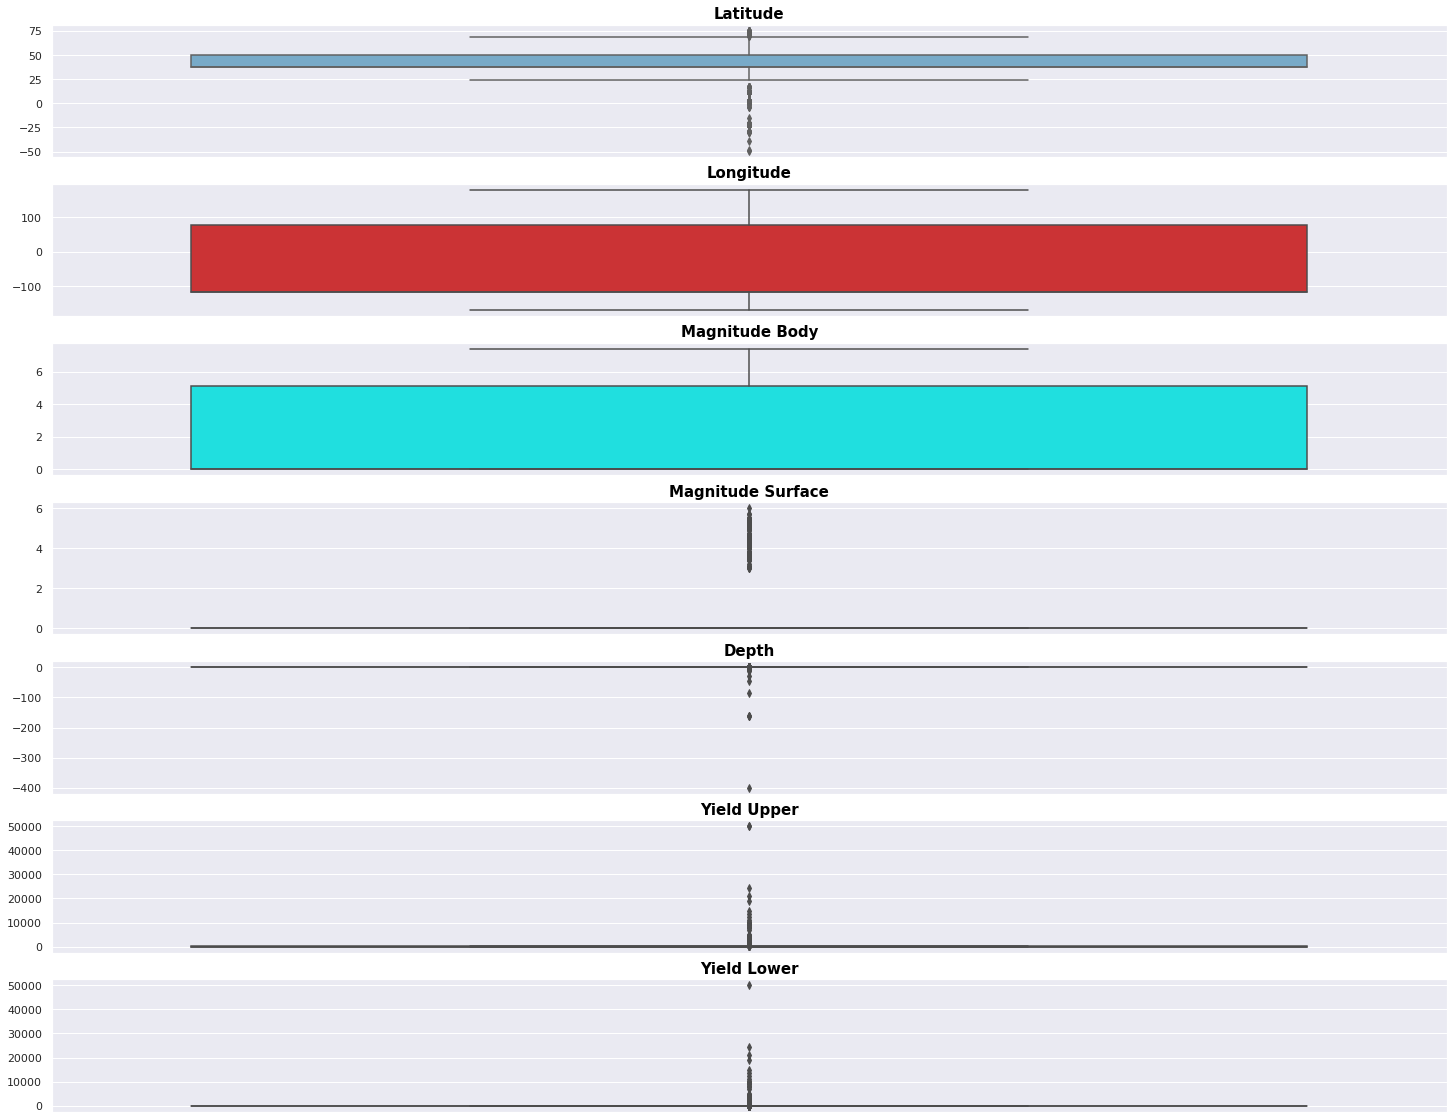

In [26]:
# Title for all box plots
title_all_graphs = "Box Plots for Continuous Features:"
centered_title = title_all_graphs.center(200)
underline = "_______________________________"
centered_underline = underline.center(200)
print(centered_title)
print(centered_underline)

# Bar plots for the continuous features
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 7,
                                                        ncols = 1,
                                                        figsize = (25, 20))

# Latitude
sns.boxplot(ax = ax0, y = df_cleaned['latitude'], palette = 'Blues')
ax0.set_title('Latitude', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("")
ax0.set_ylabel("")


# Longitude
sns.boxplot(ax = ax1, y = df_cleaned['longitude'], palette = 'Set1')
ax1.set_title('Longitude', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("")
ax1.set_ylabel("")

# Magnitude_body
sns.boxplot(ax = ax2, y = df_cleaned['magnitude_body'], color = 'cyan')
ax2.set_title('Magnitude Body', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("")

# Magnitude_surface
sns.boxplot(ax = ax3, y = df_cleaned['magnitude_surface'], color = 'magenta')
ax3.set_title('Magnitude Surface', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax3.set_xlabel("")
ax3.set_ylabel("")

# Depth
sns.boxplot(ax = ax4, y = df_cleaned['depth'], color = 'yellow')
ax4.set_title('Depth', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax4.set_xlabel("")
ax4.set_ylabel("");

# Yield_upper
sns.boxplot(ax = ax5, y = df_cleaned['yield_upper'], color = 'yellow')
ax5.set_title('Yield Upper', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax5.set_xlabel("")
ax5.set_ylabel("");

# Yield_lower
sns.boxplot(ax = ax6, y = df_cleaned['yield_lower'], color = 'yellow')
ax6.set_title('Yield Lower', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax6.set_xlabel("")
ax6.set_ylabel("");


**8.2 Bivariate Data Visualizations**

***Distribution of Continuous Features vs. Target Variable***


                                                                                       Distribution of Continuous Features vs. Target Variable                                                                                        
                                                                                          __________________________________________________                                                                                          


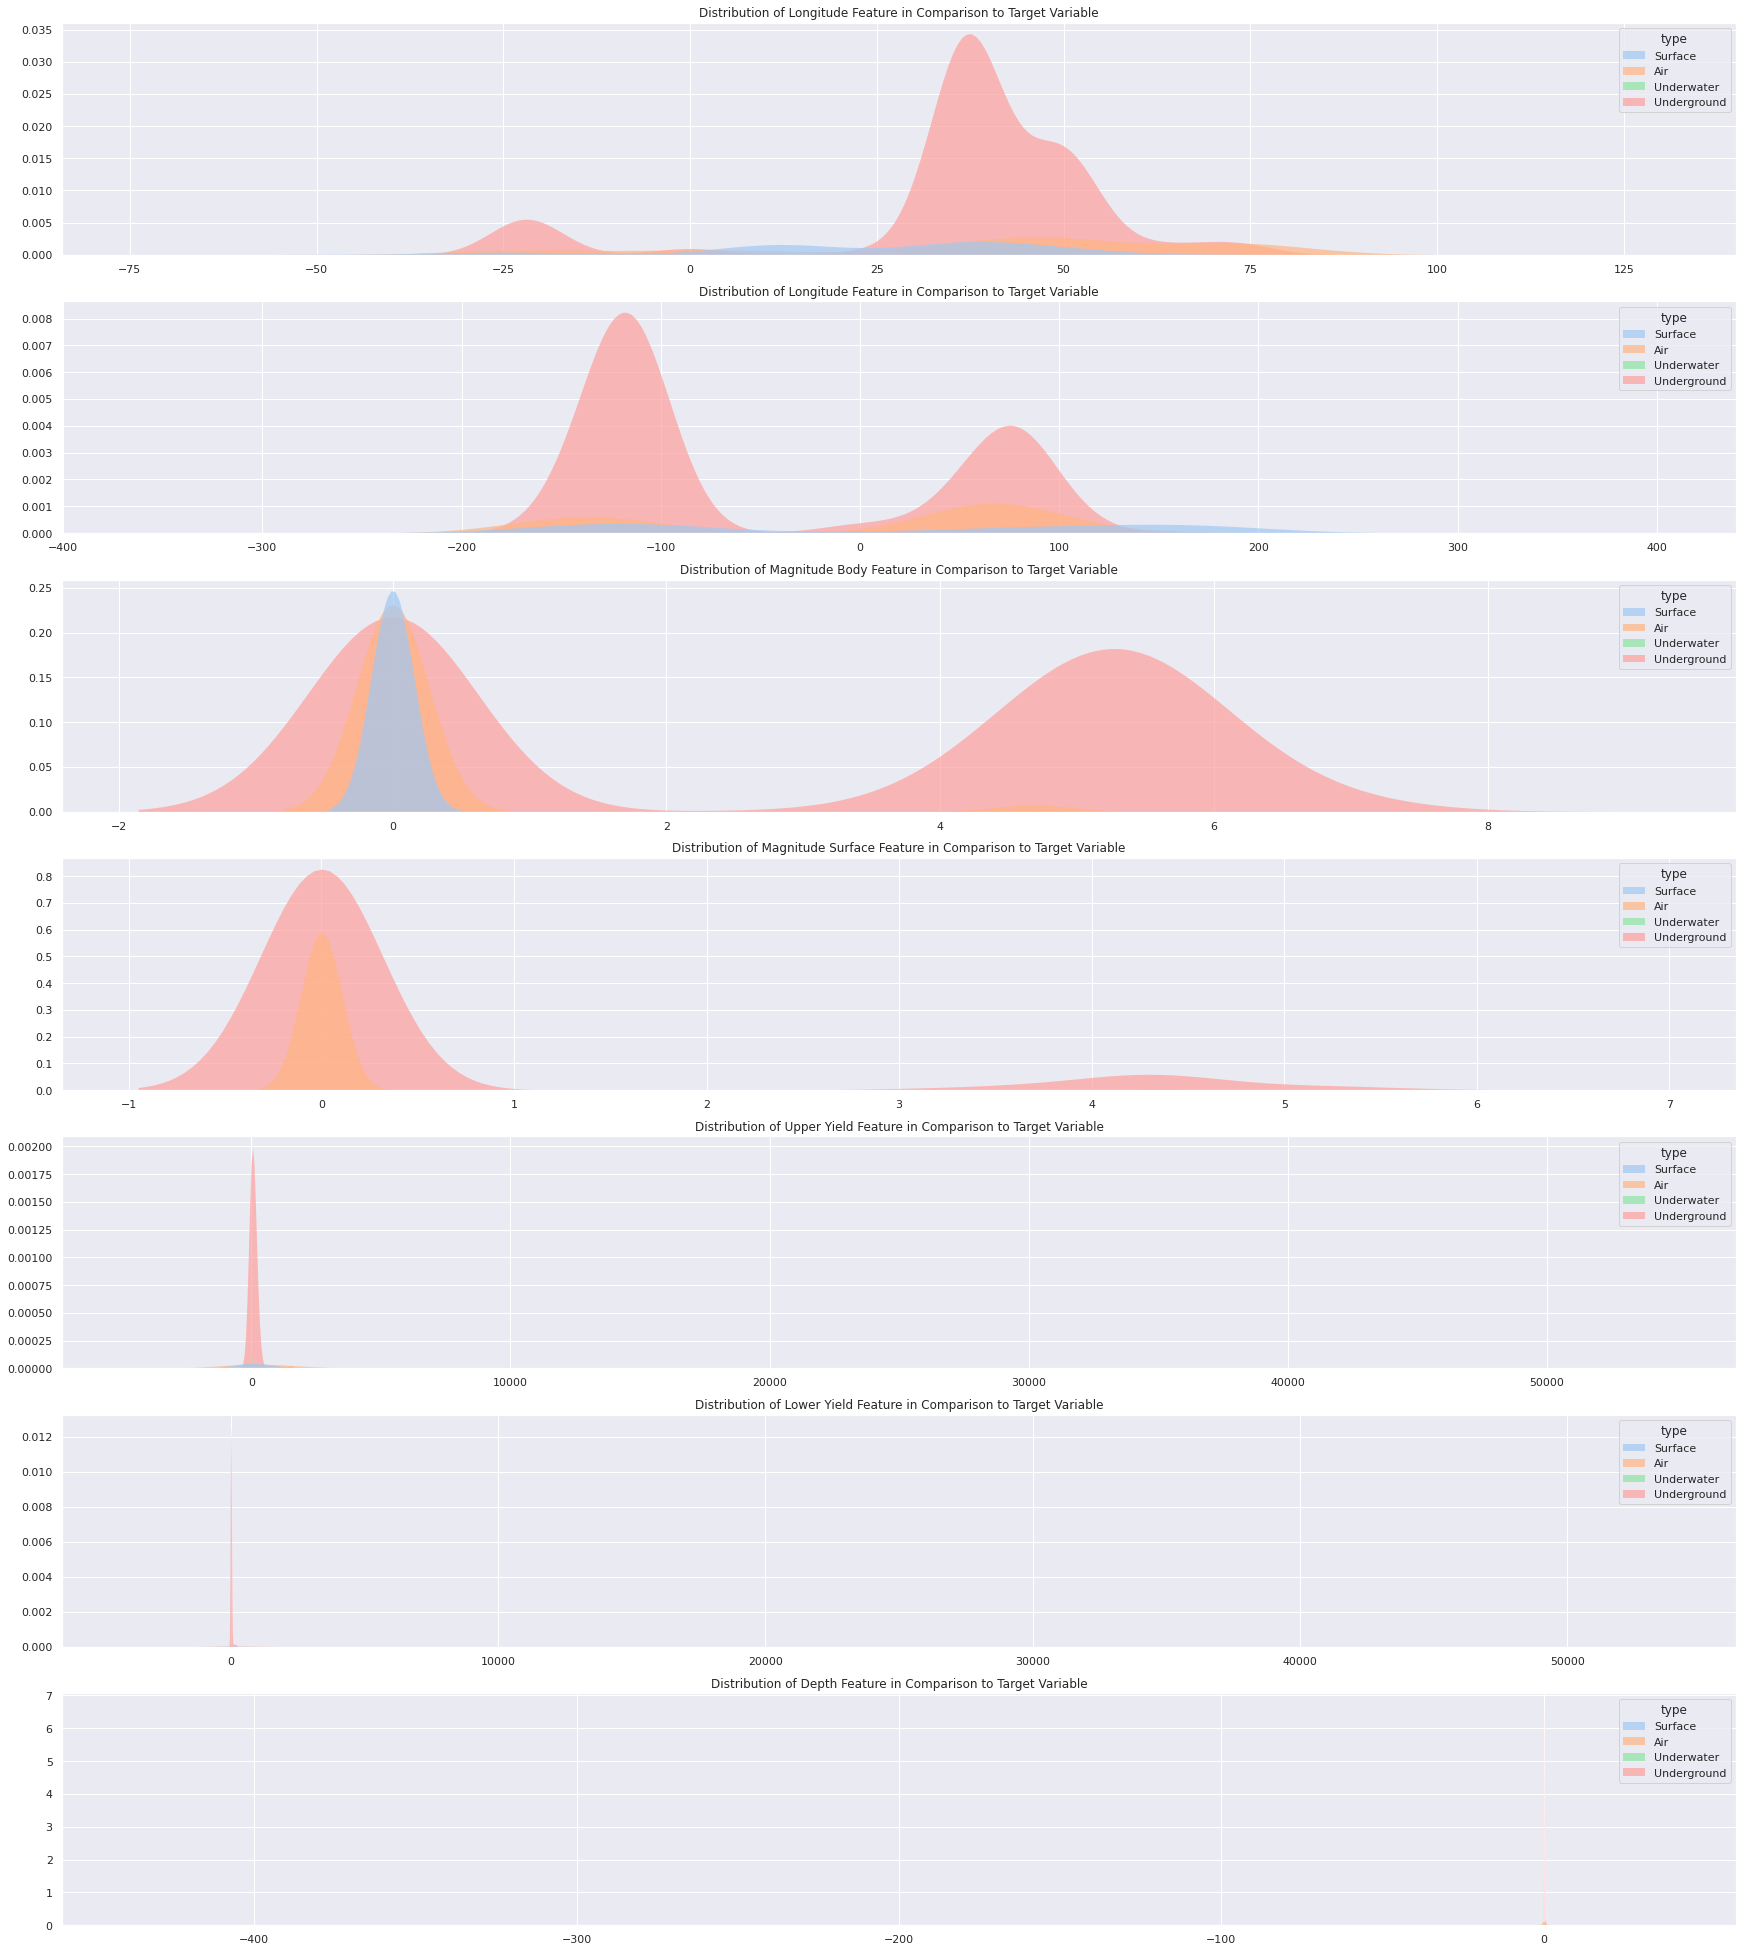

In [27]:
# Title for all density plots
title_all_graphs = "Distribution of Continuous Features vs. Target Variable"
centered_title = title_all_graphs.center(230)
underline = "__________________________________________________"
centered_underline = underline.center(230)
print(centered_title)
print(centered_underline)

# Bar plots for the continuous features
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 7,
                                                        ncols = 1,
                                                        figsize = (30, 35))

# Latitude
sns.kdeplot(ax = ax0, data = df_cleaned, x = 'latitude', hue = 'type', fill = True, alpha = 0.7, linewidth = 0)
ax0.set_title("Distribution of Longitude Feature in Comparison to Target Variable")
ax0.set_xlabel("")
ax0.set_ylabel("")

# Longitude
sns.kdeplot(ax = ax1, data = df_cleaned, x = 'longitude', hue = 'type', fill = True, alpha = 0.7, linewidth = 0)
ax1.set_title("Distribution of Longitude Feature in Comparison to Target Variable")
ax1.set_xlabel("")
ax1.set_ylabel("")

# Magnitude_body
sns.kdeplot(ax = ax2, data = df_cleaned, x = 'magnitude_body', hue = 'type', fill = True, alpha = 0.7, linewidth = 0)
ax2.set_title("Distribution of Magnitude Body Feature in Comparison to Target Variable")
ax2.set_xlabel("")
ax2.set_ylabel("")

# Magnitude_surface
sns.kdeplot(ax = ax3, data = df_cleaned, x = 'magnitude_surface', hue = 'type', fill = True, alpha = 0.7, linewidth = 0)
ax3.set_title("Distribution of Magnitude Surface Feature in Comparison to Target Variable")
ax3.set_xlabel("")
ax3.set_ylabel("")

# Yield_upper
sns.kdeplot(ax = ax4, data = df_cleaned, x = 'yield_upper', hue = 'type', fill = True, alpha = 0.7, linewidth = 0)
ax4.set_title("Distribution of Upper Yield Feature in Comparison to Target Variable")
ax4.set_xlabel("")
ax4.set_ylabel("");

# Yield_lower
sns.kdeplot(ax = ax5, data = df_cleaned, x = 'yield_lower', hue = 'type', fill = True, alpha = 0.7, linewidth = 0)
ax5.set_title("Distribution of Lower Yield Feature in Comparison to Target Variable")
ax5.set_xlabel("")
ax5.set_ylabel("");

# Depth
sns.kdeplot(ax = ax6, data = df_cleaned, x = 'depth', hue = 'type', fill = True, alpha = 0.7, linewidth = 0)
ax6.set_title("Distribution of Depth Feature in Comparison to Target Variable")
ax6.set_xlabel("")
ax6.set_ylabel("");


**8.3 Correlation Analysis**

**Correlation Matrix of Continuous Features**

In [28]:
# Correlation matrix table
corr_cont_matrix = df[continuous_cols].corr()
corr_cont_matrix

,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper
latitude,1.000000,0.436073,0.200279,0.135415,0.094360,0.058607,0.086525
longitude,0.436073,1.000000,0.182468,0.143826,0.021447,0.109935,0.107328
magnitude_body,0.200279,0.182468,1.000000,0.416517,0.042412,-0.081487,-0.041784
magnitude_surface,0.135415,0.143826,0.416517,1.000000,0.016754,-0.027555,0.020249
depth,0.094360,0.021447,0.042412,0.016754,1.000000,-0.022964,-0.015579
yield_lower,0.058607,0.109935,-0.081487,-0.027555,-0.022964,1.000000,0.863148
yield_upper,0.086525,0.107328,-0.041784,0.020249,-0.015579,0.863148,1.000000


                                                 Correlation Matrix of Continuous Features                                                  
                                                      _______________________________                                                       


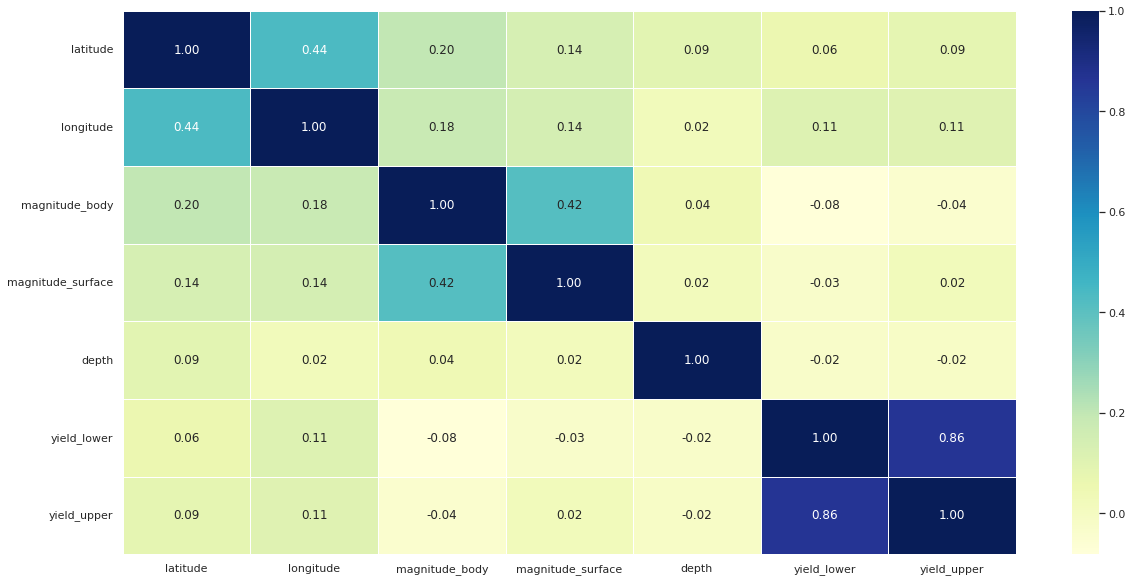

In [29]:
# Visualizing correlation matrix
# Title for Correlation Plot
title_all_graphs = "Correlation Matrix of Continuous Features"
centered_title = title_all_graphs.center(140)
underline = "_______________________________"
centered_underline = underline.center(140)
print(centered_title)
print(centered_underline)

# Plotting Correlation Matrix
plt.figure(figsize = (20, 10))
ax = sns.heatmap(corr_cont_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu');

                                                 Heatmap of Heart Disease Dataset                                                 
                                                 _______________________________                                                  


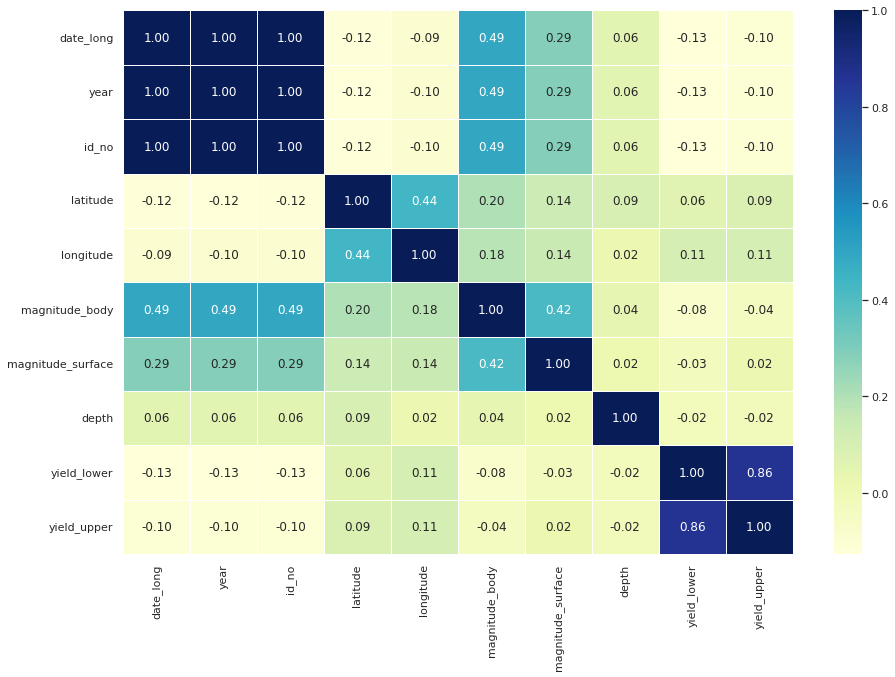

In [30]:
# Title for Correlation Plot
title_all_graphs = "Heatmap of Heart Disease Dataset"
centered_title = title_all_graphs.center(130)
underline = "_______________________________"
centered_underline = underline.center(130)
print(centered_title)
print(centered_underline)

# Correlation of all features
corr_matrix = df.corr()

# Plotting Heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix,
           annot = True,
           linewidths = 0.5,
           fmt = ".2f",
           cmap = "YlGnBu");

**Inference from Correlation Analysis:**


*   Generally speaking, none of the features have a strong correlation with each except for the `yield_upper` and `yield_lower` features, which are partically the same features with different estimations of explosion powers for a given nuclear bomb. Their correlation is strong and in the positive direction.
*   All the other features have correlation coefficients between -0.6 or 0.6 (not inclusive) indicating that none of the features or targets have strong correlations; rather relatively weak correlations between each other.



# **9. Conclusions from EDA**



1. There were 9 NaN values that were dropped and no duplicates in the dataset.
2. The data is consists of more than 5x as many nuclear bombs that were deployed underground than the other 3 types, so we have an imbalanced classification problem.
3. There is no apparent linear correlation in the negative or postive direction according the correlation matrix.
4. Intuitively, the method of deployment for the nuclear bomb may have a stronger relationship with the purpose of the nuclear bomb. The explosion power of the bomb will ultimately depend upon the purpose and not how it was deployed.
5. The most common deployment method of nuclear bombs is underground.
6. The USA has detonated more nuclear bombs regardless of the deployment method, than all the other 6 nations that are part of this dataset combined.



# **10. Data Preprocessing**

**10.1 Defining the Features and Target**

In [31]:
# Inspecting the dataframe again
df_cleaned.head(10)

,date_long,year,id_no,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,type
0,19450716,1945,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,Surface
1,19450805,1945,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,Air
2,19450809,1945,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,Air
3,19460630,1946,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,Air
4,19460724,1946,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,Underwater
5,19480414,1948,48001,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,37.0,37.0,WR,Surface
6,19480430,1948,48002,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,49.0,49.0,WR,Surface
7,19480514,1948,48003,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.08,18.0,18.0,WR,Surface
8,19490829,1949,49001,USSR,SEMI KAZAKH,DOE,48.00,76.00,0.0,0.0,0.00,22.0,22.0,WR,Surface
9,19510127,1951,51001,USA,NTS,DOE,37.00,-116.00,0.0,0.0,-0.35,1.0,1.0,WR,Air


In [32]:
# Dropping irrelevant features
df_cleaned.drop(["date_long", "year", "id_no"], axis = 1, inplace = True)
df_cleaned

,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,type
0,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,Surface
1,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,Air
2,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,Air
3,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,Air
4,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,Underwater
...,...,...,...,...,...,...,...,...,...,...,...,...
2046,CHINA,LOP NOR,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,WR,Underground
2047,INDIA,POKHRAN,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,WR,Underground
2048,INDIA,POKHRAN,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,WR,Underground
2049,PAKIST,CHAGAI,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,WR,Underground


In [33]:
# Split the data into x and y
X = df_cleaned.drop("type", axis = 1)

y = df_cleaned.type.values

In [34]:
# Independent variables (features)
X.head(5)

,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose
0,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR
1,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT
2,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT
3,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE
4,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE


In [35]:
# Target variable
y

array(['Surface', 'Air', 'Air', ..., 'Underground', 'Underground',
       'Underground'], dtype=object)

**10.2 Converting Categorical Features to Numerical**

In [36]:
# Label Encoding Categorical Features 
label_encoder = LabelEncoder()
X['country'] = label_encoder.fit_transform(X['country'])
X['region'] = label_encoder.fit_transform(X['region'])
X['source'] = label_encoder.fit_transform(X['source'])
X['purpose'] = label_encoder.fit_transform(X['purpose'])

# View X - independent variables (features)
X.head(10)

,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose
0,5,0,2,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,16
1,5,24,2,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,0
2,5,54,2,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,0
3,5,9,2,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,13
4,5,9,2,11.35,165.20,0.0,0.0,0.03,21.0,21.0,13
5,5,16,2,11.30,162.15,0.0,0.0,-0.08,37.0,37.0,16
6,5,16,2,11.30,162.15,0.0,0.0,-0.08,49.0,49.0,16
7,5,16,2,11.30,162.15,0.0,0.0,-0.08,18.0,18.0,16
8,6,68,2,48.00,76.00,0.0,0.0,0.00,22.0,22.0,16
9,5,56,2,37.00,-116.00,0.0,0.0,-0.35,1.0,1.0,16


In [37]:
# Label Encoding Target Feature (Deployment type - 'type' variable)
y = label_encoder.fit_transform(y)

# View y - array of depedent variables ('type' feature)
y

array([1, 0, 0, ..., 2, 2, 2])

**10.3 Training and Test Split**

In [38]:
# Set random seed for consistency and reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variables
                                                    test_size = 0.2) # percentage of data to use for test set

# Sizes of test & training sets
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is: ", y_test.shape)

The shape of X_train is: (1636, 11)
The shape of X_test is:  (409, 11)
The shape of y_train is: (1636,)
The shape of y_test is:  (409,)


# **11. Modelling**

**11.1 Model Choices on Imbalanced Data Classification Problem**

Now, that the data has been prepared for modelling, we can start to fit the models. Since this is a multiclass classification problem and most machine learning algorithms assume that all classes have an equal number of classes, we will need to modify our algorithms to account for the imbalance with ***Cost-Sensitive Learning*** First, we will be using the following models as baseline models and compare their results before implementing ***Cost-Sensitive Learning***:

Logistic Regression - LogisticRegression()

1.   Logistic Regression - `LogisticRegression()`
2.   Support Vector Classifier - `SVC()`
3.   Decision Tree Classifier - `DecisionTreeClassifier()`
4.   Random Forest Classifier - `RandomForestClassifier()`
5.   Gradient Boost Classifier - `GradientBoostingClassifier()`

**Why these?**
We selected these models through the help of the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). Since this is a binary classification problem with 303 samples that are not text data, the documentation suggests the usage of:



*   Linear SVC
*   KNeighbors Classifier
*   SVC
*   Ensemble Classifier








In [39]:
# Put models in a dictionary
models = {"SVC": SVC(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Gradient Boost Classifier": GradientBoostingClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: labels associated with training data
    y_test: labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Lopp through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [40]:
# Obtain scores for models
model_scores = fit_and_score(models = models,
                         X_train = X_train,
                         X_test = X_test,
                         y_train = y_train,
                         y_test = y_test)
model_scores

{'SVC': 0.7457212713936431,
 'Logistic Regression': 0.8190709046454768,
 'Random Forest': 0.9315403422982885,
 'Decision Tree': 0.9315403422982885,
 'Gradient Boost Classifier': 0.9559902200488998}

**11.2 Model Comparison**

In [41]:
# Creating dataframe of model scores
model_compare = pd.DataFrame(model_scores, index = ['Accuracy'])
model_compare

,SVC,Logistic Regression,Random Forest,Decision Tree,Gradient Boost Classifier
Accuracy,0.745721,0.819071,0.93154,0.93154,0.95599


                                                      Model Comparison:                                                      
                                               _______________________________                                               


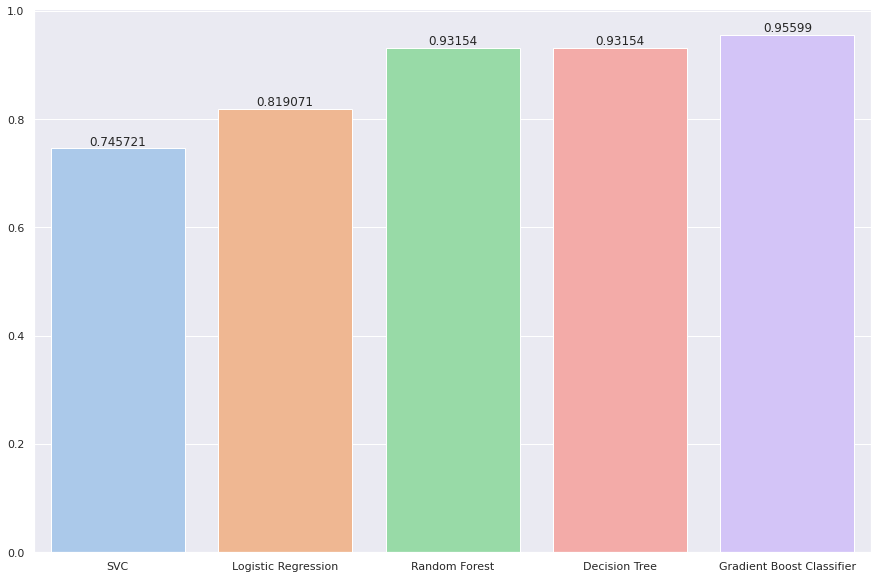

In [42]:
# Visualizing model results
# Title for Model Comparison Bar Plot
title_graph = "Model Comparison:"
centered_title = title_graph.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plot model results
plt.figure(figsize = (15, 10))
model_plot = sns.barplot(data = model_compare)
model_plot.bar_label(model_plot.containers[0]);

The best performing model was the **Gradient Boost Classifier** with an accuracy of about **95%**; followed by the **Random Forest and Decision Tree Classifiers** with accuracies of about **93%**. We try to account for the imbalance between the classes of the target variable to assess how the models perform before trying to tune their hyperparameters. 

# **12. Cost Sensitive Learning for Multi-Class Classification**

To account for the lack of balance between the classes, the baseline algorithms will have to be modified to bias towards the classes that have fewer classes in the training dataset. Therefore, ***Cost Sensitive Learning*** will be employed.

**12.1 Training Cost Sensitive Learning Models**

In [43]:
# Put Cost Sensitve Learning models in a dictionary
cost_sensitive_learning_models = {"SVC": SVC(class_weight = 'balanced'),
                                  "Logistic Regression": LogisticRegression(class_weight = 'balanced'),
                                  "Random Forest": RandomForestClassifier(class_weight = 'balanced'),
                                  "Decision Tree": DecisionTreeClassifier(class_weight = 'balanced'),}

# Obtain scores for Cost Sensitive Learning models
cost_sensitive_learning_model_scores = fit_and_score(models = cost_sensitive_learning_models,
                                                     X_train = X_train,
                                                     X_test = X_test,
                                                     y_train = y_train,
                                                     y_test = y_test)

cost_sensitive_learning_model_scores

{'SVC': 0.5036674816625917,
 'Logistic Regression': 0.7286063569682152,
 'Random Forest': 0.902200488997555,
 'Decision Tree': 0.8973105134474327}

**12.2 Model Comparison with Cost Sensitve Learning**

In [44]:
# Creating dataframe of model scores
model_cost_sensitive_learning_compare = pd.DataFrame(cost_sensitive_learning_model_scores, index = ['Accuracy'])
model_cost_sensitive_learning_compare

,SVC,Logistic Regression,Random Forest,Decision Tree
Accuracy,0.503667,0.728606,0.9022,0.897311


                                        Model Comparison with Cost Sensitive Learning:                                       
                                           _______________________________________                                           


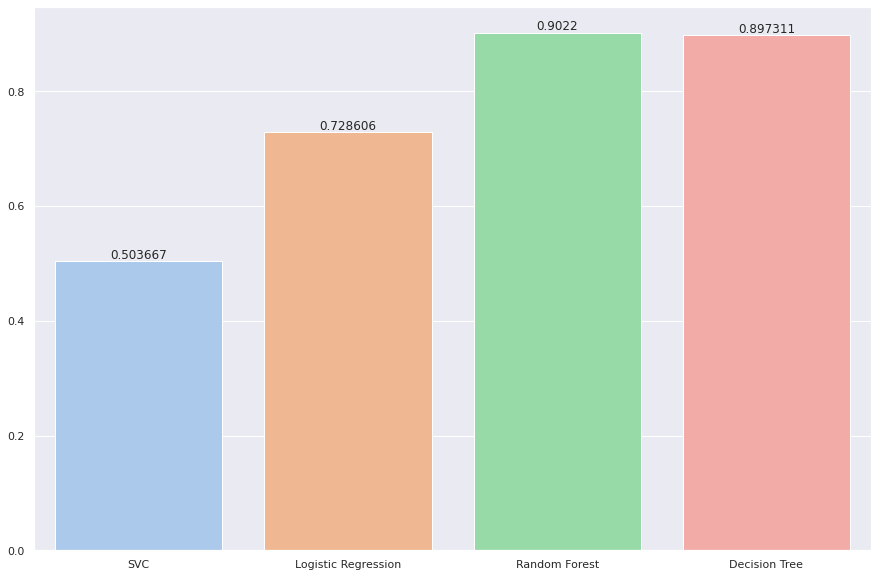

In [45]:
# Visualizing model results
# Title for Model Comparison Bar Plot
title_graph = "Model Comparison with Cost Sensitive Learning:"
centered_title = title_graph.center(125)
underline = "_______________________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plot model results
plt.figure(figsize = (15, 10))
model_plot = sns.barplot(data = model_cost_sensitive_learning_compare)
model_plot.bar_label(model_plot.containers[0]);

Cost-sensitive learning reduced the overall accuracy slightly, but it ensures that the rare classes are taken into consideration with equal weight. The best performing cost-sensitve learner was the **Random Forest Classifier** with an accuracy of overall accuracy of about **90%**. We will try to improve the accuracy of this baseline model through hyperparameter tuning. 

# **13. Hyperparameter Tuning and Cross-Validation**

To test different hyperparameters, the data will be **cross-validated**.

Model improvement framework:



1.   Tune model hyperparameters, see which performs best.
2.   Perform cross-validation. 
3.   Plot ROC curves.
4.   Make a confusion matrix.
5.   Get precision, recall and F-1 score metrics.
6.   Find the mode important model features.

We will be tuning the **Random Forest Classifier** with **Cost-Sensitive Learning** through leveraging **GridSearchCV** and **RandomizedSearchCV** since it provided the highest classification accuracy at **0.9022** compared to the other classifiers. 





**13.1 Tuning Models with `RandomizedSearchCV`**

In [50]:
# Different RandomForestClassifier() hyperparameters with Cost-Sensitive Learning
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(5, 20, 2),
           "min_samples_leaf": np.arange(5, 15, 2)}

Now let's use `RandomizedSearchCV` to try and tune the `RandomForestClassifier() model. Through passing different hyperparameters from `rf_grid` as well as setting `n_iter = 20`

In [53]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(class_weight = 'balanced'),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [54]:
# Check the best parameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 17,
 'min_samples_leaf': 5,
 'max_depth': None}

In [55]:
# Evaluate the model
rs_rf.score(X_test, y_test)

0.921760391198044

`RandomizedSearchCV()` provided a **1% increase** in accuracy (~0.92) from the baseline model with the speficied hyperparameters for the `RandomForestClassifier()`. 


**13.2 Tuning Models with `GridSearchCV`**

We will continue to improve our `RandomForestClassifier()` model to ensure best predictions with `GridSearchCV` as it continues to provides the best results over the other models.

In [56]:
# Different RandomForestClassifier() hyperparameters
rf_clf_grid = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

# Setup random hyperparameter search for RandomForestClassifier
gs_rf_clf = GridSearchCV(RandomForestClassifier(class_weight = 'balanced'),
                         param_grid = rf_clf_grid,
                         cv = 5,
                         verbose = True)

# Fit grid hyperparameter search model
gs_rf_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [57]:
# Check the best parameters
gs_rf_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [60]:
# Evaluate the model
gs_rf_clf.score(X_test, y_test)

0.9242053789731052

In this case, we get a slightly better performance with the best parameters from the hyperparameter grid on the `RandomForestClassifier()` model with `GridSearchCV`. However, there were only 60 different hyperparameter combinations. More combinations could be used, but this would take too much time on our devices, and the results of the `RandomForestClassifier()` model are quite promising with parameters obtained from `GridSearchCV` with an accuracy of **~92.4%**, which is a **1.2% increase** from the baseline cost-sensitive learning model and a **0.3% increase** from the best model obtained through `RandomizedSearchCV`. We will save this model and use it for further evaluation. 

# **14 Evaluation**

Let's assess metric beyond just accuracy.

Metrics:

*   Cofusion Matrix - `confusion_matrix()`
*   Precision - `precision_score()`
*   Recall - `recall_score()`
*   F1-Score - `f1_score()`

Firstly, predictions on the test data will have to be made.







**14.1 Predictions**

In [63]:
# Make predictions on test data with best model obtained through GridSearchCV
y_preds = gs_rf_clf.predict(X_test)

In [64]:
# Check predictions
y_preds

array([0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2,
       0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 3, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,

In [65]:
# Check test set
y_test

array([0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1,
       1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,

With these prediction values, we can find the metrics we'd like to see.

**14.2 Confusion Matrix**

In [75]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 51  10   6   0]
 [  3  37   2   1]
 [  2   7 290   0]
 [  0   0   0   0]]


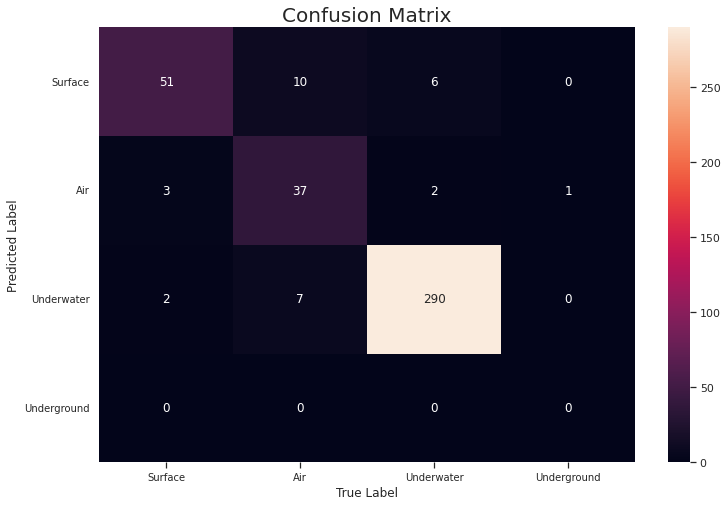

In [80]:
# Visualizing confusion matrix
def plot_conf_mat(y_test, y_preds):
  """
  Plots a confusion matrix using Seaborn's heatmap().
  """
  # Get class labels
  labels = ['Surface', 'Air', 'Underwater', 'Underground']
  # Create heatmap
  fig, ax = plt.subplots(figsize = (12, 8))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot = True, # Annotate Boxes
                   fmt = 'g')
  # Add labels
  plt.title('Confusion Matrix', fontsize = 20)
  ax.xaxis.set_ticklabels(labels, fontsize = 10)
  ax.xaxis.tick_bottom()
  plt.xlabel("True Label")
  ax.yaxis.set_ticklabels(labels, fontsize = 10)
  plt.yticks(rotation = 0)
  plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

**Conclusions from from Confusion Matrix:** 
* There are **5** ocassions where the `Surface` deployment type was not labeled correctly; labeled as `Air` 3 times and `Underwater` 2 times. 
* There are **17** ocassions where the `Air` deployment type was not labeled correctly; labeled as `Underwater` 7 times and `Surface` 10 times. 
* There are **8** times the `Underwater` deployment type was not labeled correctly; labeled as `Air` 2 times and `Surface` 6 times. 
* Finally, the `Underground` deployment type was labeled incorrectly **1** time and that was as the `Air` deployment type.

**14.3 Classification Report**

In [81]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        67
           1       0.69      0.86      0.76        43
           2       0.97      0.97      0.97       299
           3       0.00      0.00      0.00         0

    accuracy                           0.92       409
   macro avg       0.64      0.65      0.64       409
weighted avg       0.93      0.92      0.93       409



We have finally achieved some deeper insights on the model, but these metrics were obtained using a single training and test set. It seems our model did poorly at classifying the `Underground` deployment type but that was a consequence of a very small sample size in the test data. Additionally, the `Air` deployment type can also be improved through having more data to represent this class.

**14.4 Cross-Validated Metrics**

We'll obtain more precise metrics through cross-validation. This will be done by using the best model (`RandomForestClassifier`) with the best hyperparameters and using `cross_val_score()` on the **accuracy** metric.

In [82]:
# Best parameters through hyperparameter tuning on RandomForestClassifier()
gs_rf_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [91]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = RandomForestClassifier(max_depth = None,
                             max_features = 'auto',
                             min_samples_leaf = 2,
                             min_samples_split = 6,
                             n_estimators = 100,
                             class_weight = 'balanced')

Now that we have an instantiated classifier, let's find some cross-validated metrics.

In [92]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5, # 5-fold cross-validation
                         scoring = "accuracy") # accuracy as scoring

cv_acc

array([0.8190709 , 0.92420538, 0.93643032, 0.87530562, 0.79706601])

Since there are 5 metrics, we'll take the average. 

In [93]:
# Average of cross-validated accuracy
cv_acc = np.mean(cv_acc)
cv_acc

0.8704156479217605

An overall average 5-fold cross-validated accuracy of **87%** was obtained by the model.

# **15. Feature Importance**

Which features contribute most to a model predicting/classifying a nuclear deployment type?

In [96]:
# Fit an instance of RandomForestClassifier()
clf.fit(X_train, y_train);

In [97]:
# Check coefficients
clf.feature_importances_

array([0.02411903, 0.06823048, 0.05498774, 0.10525626, 0.10724618,
       0.09797631, 0.00115722, 0.1158286 , 0.12684806, 0.12966085,
       0.16868928])

In [103]:
# Match features to columns in dataframe
feature_importances_s = pd.Series(clf.feature_importances_, index = X.columns)

In [104]:
# Converting series to dataframe
feature_importance_df = feature_importances_s.to_frame('value').T
feature_importance_df

,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose
value,0.024119,0.06823,0.054988,0.105256,0.107246,0.097976,0.001157,0.115829,0.126848,0.129661,0.168689


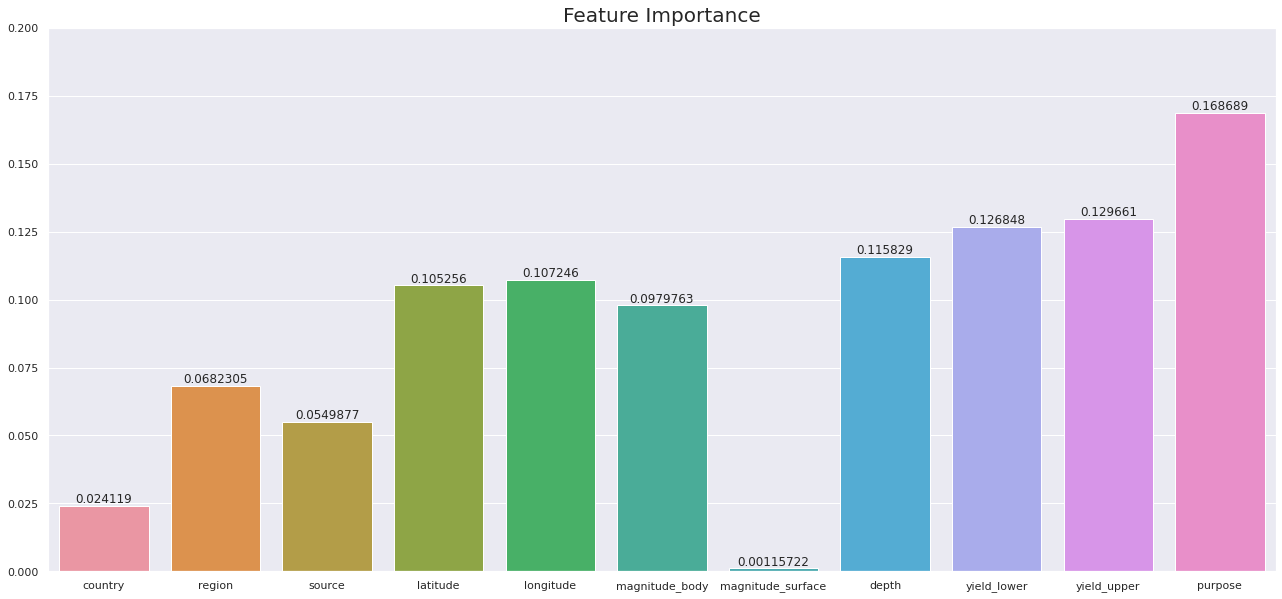

In [114]:
# Visualize feature importance
plt.figure(figsize = (22, 10))
feature_importance_plot = sns.barplot(data = feature_importance_df)
feature_importance_plot.set_title("Feature Importance", fontsize = 20)
feature_importance_plot.bar_label(feature_importance_plot.containers[0])
plt.ylim(0, 0.2);

**Conclusions from Feature Importance**


*   `purpose`, `yield_upper`, `yield_lower`, and `depth` are the most important features for determining/predicting the deployment methods of nuclear bombs.
*   `magnitude` and `country` are the least important features for determining/predicting the deployment methods of nuclear bombs.



# **16. Experimentation**

Did the final and best model achieve the desired accuracy from the problem statement?



> If we can reach  a 95% accuracy at predicting/classifying nuclear bomb deployment methods during this proof of concept, we'll pursue this project.

Since the highest accuracy our model achieved was , the target was **92.4** the target was not achieved.

Further experimentation will be required, such as testing different models (`CatBoost`? `XGBoost`?), trying to tune different hyperparameters, and selecting the most important features for the prediction process. Through these steps, achieving an accuracy closer to or beyond 95% is certainly possible.



# **17. Saving Models**

The best model will be saved using the **joblib** library.

In [115]:
from joblib import dump

# Save model to file
dump(clf, filename = "gs_rf_nuclear_bomb_classifier.joblib")

['gs_rf_nuclear_bomb_classifier.joblib']